### Código LEC4 2024-2

Grupo A 

In [7]:
# Importación de librerías:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import norm
import scipy.stats as stats

##### 2.1 Estimación de Máxima Verosimilitud 

a) Generar conjunto de datos

In [8]:
# Conjunto de datos: Media = 5, Desviación estandar = 2.5
data = np.random.normal(loc = 5, scale = 2.5, size = 1000)

- b) Función de verosimilitud: 
$$L(\mu, \sigma^2) = \prod_{i = 1}^{1000} \frac{1}{\sqrt{2 \pi \sigma^2}} e^{\left( -\frac{(x_i - \mu)^2}{2 \sigma^2} \right)}$$

Simplificando: 
$$\displaystyle L(\mu, \sigma^2) =  \left( \frac{1}{\sqrt{2 \pi \sigma^2}} \right)^{1000} e^{\left( -\frac{1}{2 \sigma^2}\sum_{i=1}^{1000}(x_i - \mu)^2 \right)}$$

- c) log-verisimilitud:
$$ \log(L(\mu, \sigma^2)) = -\frac{n}{2}\log(2\sqrt{\pi}\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{1000}\left(x_i -\mu\right)^2$$


d) Estimar los parametros

In [9]:
# Log-verisimilitud:
def log_veri(params):
    mu = params[0]
    sigma = params[1]
    n = len(data)
    L = -n/2 * np.log(2 * np.pi) - n/2 * np.log(sigma**2) - 1/(2 * sigma**2) * np.sum((data - mu)**2)
    return -L

In [14]:
# Definimos params iniciales:
params = np.array([5, 2.5])

# Usamos minimize para estimar los parámetros:
resultados = minimize(log_veri, params)

# Imprimimos los resultados:
mu = resultados.x[0]
sigma = resultados.x[1]
print('Media estimada:', mu, '\nDesviación estandar estimada:', sigma)

Media estimada: 5.001384509490916 
Desviación estandar estimada: 2.585494086953342


e) Histograma con los parametros y data inicial

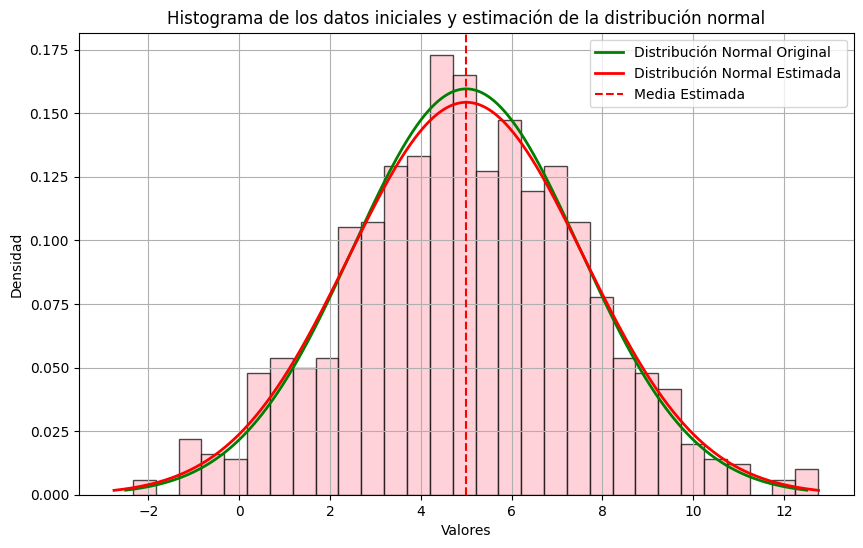

In [11]:
# Histogramas
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, color='pink', edgecolor='black', alpha=0.7, density=True)
plt.title('Histograma de los datos iniciales y estimación de la distribución normal')
plt.xlabel('Valores')  
plt.ylabel('Densidad')

# Distribución original
x_original = np.linspace(params[0] - 3 * params[1], params[0] + 3 * params[1], 1000)
pdf_original = norm.pdf(x_original, params[0], params[1])
plt.plot(x_original, pdf_original, color='green', lw=2, label='Distribución Normal Original')

# Distribución estimada
x_estimado = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
pdf_estimado = norm.pdf(x_estimado, mu, sigma)
plt.plot(x_estimado, pdf_estimado, color='red', lw=2, label='Distribución Normal Estimada')

# Marcar la media estimada
plt.axvline(x=mu, color='red', linestyle='--', label='Media Estimada')

plt.legend()
plt.grid()
plt.show()


f) Calcular un intervalo de confianza de 95% de los parametros, luego graficar:
- El intervalo de confianza se calcula como $$IC = \mu \pm Z_{\alpha/2} \cdot SE$$, donde SE $$\frac{\sigma}{\sqrt{n}}$$

In [12]:
# Calculamos SE:
SE_media = sigma / np.sqrt(1000)
z_critico = stats.norm.ppf(0.975)

margen1 = z_critico * SE_media
ICmedia = (mu - margen1, mu + margen1)

SE_std = sigma / np.sqrt(2 * (999))

margen2 = z_critico * SE_std
ICstd = (sigma - margen2, sigma + margen2)

print(f"Intervalo de confianza del 95% de la media: ({ICmedia[0]:.4f}, {ICmedia[1]:.4f})")
print(f"Intervalo de confianza del 95% de la desviación estándar: ({ICstd[0]:.4f}, {ICstd[1]:.4f})")


Intervalo de confianza del 95% de la media: (4.8411, 5.1616)
Intervalo de confianza del 95% de la desviación estándar: (2.4721, 2.6989)


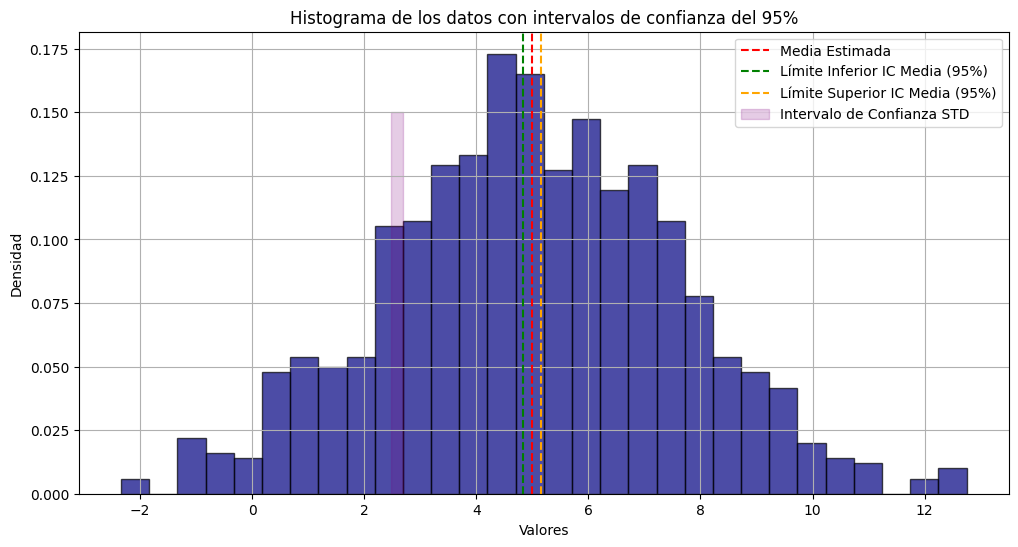

In [13]:
# Gráficos
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, color='navy', edgecolor='black', alpha=0.7, density=True)
plt.title('Histograma de los datos con intervalos de confianza del 95%')
plt.xlabel('Valores')  
plt.ylabel('Densidad')

# Marcar la media
plt.axvline(x=mu, color='red', linestyle='--', label='Media Estimada')

# Marcar el intervalo de confianza para la media
plt.axvline(x=ICmedia[0], color='green', linestyle='--', label='Límite Inferior IC Media (95%)')
plt.axvline(x=ICmedia[1], color='orange', linestyle='--', label='Límite Superior IC Media (95%)')

# Marcar el intervalo de confianza para la desviación estándar 
plt.fill_betweenx(y=[0, 0.15], x1=ICstd[0], x2=ICstd[1], 
                  color='purple', alpha=0.2, label='Intervalo de Confianza STD')

# Añadir leyenda y cuadrícula
plt.legend()
plt.grid()
plt.show()